#EXO1

**First, let's start by visualizing the data using a scatter plot:**

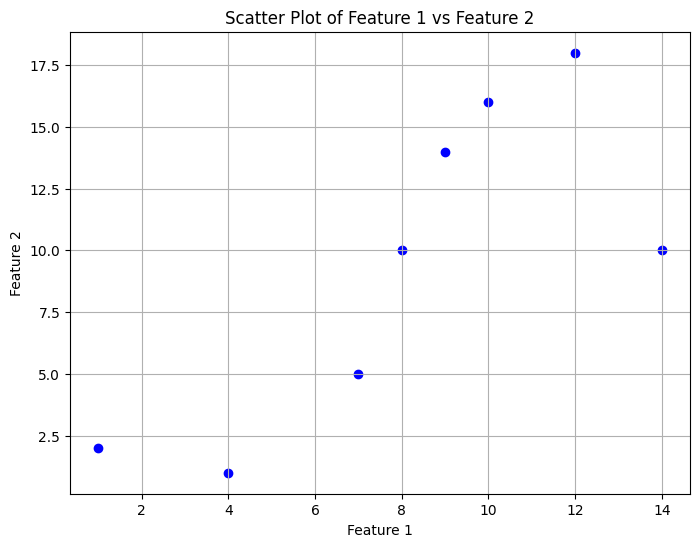

In [1]:
import matplotlib.pyplot as plt

# Data
feature1 = [4, 1, 9, 7, 10, 12, 14, 8]
feature2 = [1, 2, 14, 5, 16, 18, 10, 10]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(feature1, feature2, color='blue')
plt.title('Scatter Plot of Feature 1 vs Feature 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


**Now, let's compute the k-nearest neighbors (k=4) of the point (11, 3) using Python from scratch:**


In [2]:
import numpy as np

# Test point
test_point = np.array([11, 3])

# Train data
train_data = np.array([[4, 1],
                       [1, 2],
                       [9, 14],
                       [7, 5],
                       [10, 16],
                       [12, 18],
                       [14, 10],
                       [8, 10]])

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

# Function to compute k nearest neighbors
def k_nearest_neighbors(train_data, test_point, k):
    distances = []
    for i in range(len(train_data)):
        distance = euclidean_distance(train_data[i], test_point)
        distances.append((distance, i))
    distances.sort()  # Sorting distances
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][1])  # Adding the index of the neighbor
    return neighbors

# Computing k nearest neighbors for the test point
k = 4
nearest_neighbors = k_nearest_neighbors(train_data, test_point, k)
print("Indices of k nearest neighbors:", nearest_neighbors)
print("Coordinates of k nearest neighbors:")
for index in nearest_neighbors:
    print(train_data[index])


Indices of k nearest neighbors: [3, 0, 6, 7]
Coordinates of k nearest neighbors:
[7 5]
[4 1]
[14 10]
[ 8 10]


**Finally, let's calculate the k-nearest neighbors using sklearn.neighbors module:**

In [3]:
from sklearn.neighbors import NearestNeighbors

# Creating NearestNeighbors object
knn = NearestNeighbors(n_neighbors=k, algorithm='auto')
knn.fit(train_data)

# Finding k-nearest neighbors for the test point
distances, indices = knn.kneighbors([test_point])
print("Indices of k nearest neighbors using sklearn:", indices[0])
print("Coordinates of k nearest neighbors using sklearn:")
for index in indices[0]:
    print(train_data[index])


Indices of k nearest neighbors using sklearn: [3 0 7 6]
Coordinates of k nearest neighbors using sklearn:
[7 5]
[4 1]
[ 8 10]
[14 10]


# EXO2

**This code will create and train a KNN model using the Iris dataset, and then predict the classes of the given observations based on the classes of their neighbors. Adjust the value of k as per your preference.**

In [4]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# Load Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Create and train KNN model
k = 3  # You can choose any suitable value for k
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X, y)

# Given observations
observations = [[5.4, 3.3, 5.9, 1.1], [1, 1, 1, 1]]

# Predict classes based on neighbors
for observation in observations:
    predicted_class = knn_model.predict([observation])
    print("Observation:", observation)
    print("Predicted class:", iris.target_names[predicted_class[0]])


Observation: [5.4, 3.3, 5.9, 1.1]
Predicted class: virginica
Observation: [1, 1, 1, 1]
Predicted class: setosa
